In [1]:
'''
Note: this code will not work unless in pansat env!
'''


import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from pyhdf.SD import SD, SDC
import glob

ModuleNotFoundError: No module named 'pyhdf'

In [2]:
def read_pp(pp_file):
    
    with open(pp_file, 'rb') as f:
        
        npixs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlevs = nlyrs + 1
        
        data = {}

        data['hgt']     = np.zeros([nlevs], dtype='f')
        data['sctime']  = np.zeros([npixs,6], dtype='i')
        data['lats']    = np.zeros([npixs], dtype='f')
        data['lons']    = np.zeros([npixs], dtype='f')
        data['Tbs']     = np.zeros([npixs, 10], dtype='f')
        data['eia']     = np.zeros([npixs, 10], dtype='f')
        data['refl']    = np.zeros([npixs, nlyrs], dtype='f')
        data['tcwv']    = np.zeros([npixs], dtype='f')
        data['tclw']    = np.zeros([npixs], dtype='f')
        data['tciw']    = np.zeros([npixs], dtype='f')
        data['sst']     = np.zeros([npixs], dtype='f')
        data['rey_sst'] = np.zeros([npixs], dtype='f')
        data['rss_sst'] = np.zeros([npixs], dtype='f')
        data['t2m']     = np.zeros([npixs], dtype='f')
        data['d2m']     = np.zeros([npixs], dtype='f')
        data['wind']    = np.zeros([npixs], dtype='f')
        data['slp']     = np.zeros([npixs], dtype='f')
        data['tprof']   = np.zeros([npixs, nlevs], dtype='f')
        data['pres']    = np.zeros([npixs, nlevs], dtype='f')
        data['hum']     = np.zeros([npixs, nlevs], dtype='f')
        data['fl']      = np.zeros([npixs], dtype='f')
        data['flbin']   = np.zeros([npixs], dtype='i')
        data['cldbse']  = np.zeros([npixs], dtype='f')
        data['cbbin']   = np.zeros([npixs], dtype='i')
        data['lcl']     = np.zeros([npixs], dtype='f')
        data['qflg']    = np.zeros([npixs], dtype='i')
        data['sfctype'] = np.zeros([npixs], dtype='i')
        data['modiscf'] = np.zeros([npixs,31], dtype='i')
        data['prcp']    = np.zeros([npixs], dtype='f')
        data['snow']    = np.zeros([npixs], dtype='f')

        data['hgt'][:] = np.fromfile(f, sep='', count=nlevs, dtype='f')
        data['sctime'][:] = np.fromfile(f, sep='', count=npixs*6, dtype='i').reshape(6,npixs).T
        data['lats'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['lons'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['Tbs'][:] = np.fromfile(f, sep='', count=npixs*10,dtype='f').reshape(10,npixs).T
        data['eia'][:] = np.fromfile(f, sep='', count=npixs*10, dtype='f').reshape(10,npixs).T
        data['refl'][:] = np.fromfile(f, sep='', count=npixs*nlyrs, dtype='f').reshape(nlyrs,npixs).T
        data['tcwv'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['tclw'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['tciw'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['sst'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['rey_sst'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['rss_sst'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['t2m'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['d2m'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['wind'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['slp'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['tprof'][:] = np.fromfile(f, sep='', count=npixs*nlevs, dtype='f').reshape(nlevs,npixs).T
        data['pres'][:] = np.fromfile(f, sep='', count=npixs*nlevs, dtype='f').reshape(nlevs,npixs).T
        data['hum'][:] = np.fromfile(f, sep='', count=npixs*nlevs, dtype='f').reshape(nlevs,npixs).T
        data['fl'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['flbin'][:] = np.fromfile(f, sep='', count=npixs, dtype='i')
        data['cldbse'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['cbbin'][:] = np.fromfile(f, sep='', count=npixs, dtype='i')
        data['lcl'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        data['qflg'][:] = np.fromfile(f, sep='', count=npixs, dtype='i')
        data['sfctype'][:] = np.fromfile(f, sep='', count=npixs, dtype='i')
        data['modiscf'][:] = np.fromfile(f, sep='', count=npixs*31, dtype='i').reshape(31,npixs).T
        data['prcp'][:] = np.fromfile(f, sep='', count=npixs, dtype='f')
        
        
        
    return data


In [3]:
#---Pick a file:

file = '/edata2/spencer/OE/amsr2_radar/outputs/retrievals/201501/20150101/AMSR2.CSAT.20150101.013962_cloudy.nc'

cdate = file.split('/')[-1].split('.')[2]

clear_file = glob.glob(f'{file[:-9]}clear.nc')[0]

with xr.open_dataset(file) as f:
    alat = f.Latitude.values
    alon = f.Longitude.values
    achi = f.ChiSquared.values
    atime = f.ScTime.values.T
    
with xr.open_dataset(clear_file) as f:
    achi_clear = f.ChiSquared.values
    
success_flag = np.zeros(achi.size, dtype='int')
success_flag[:] = -1

for i in np.arange(0,achi.size):
    if achi[i] > 0.: success_flag[i] = 0
    if achi_clear[i] > 0.: success_flag[i] = 1

In [4]:
modis_file = '/edata2/spencer/MODIS/MYD06_L2.A2015001.0655.061.2018047190348.hdf'

hdf = SD(modis_file, SDC.READ)
mlat = hdf.select('Latitude')[:]
mlon = hdf.select('Longitude')[:]
cfrac = hdf.select('Cloud_Fraction')[:]
cref  = hdf.select('Atm_Corr_Refl')[:,:,0] * 1.0e-04 #0.65um
cref[np.where(cref < 0.)] = np.nan

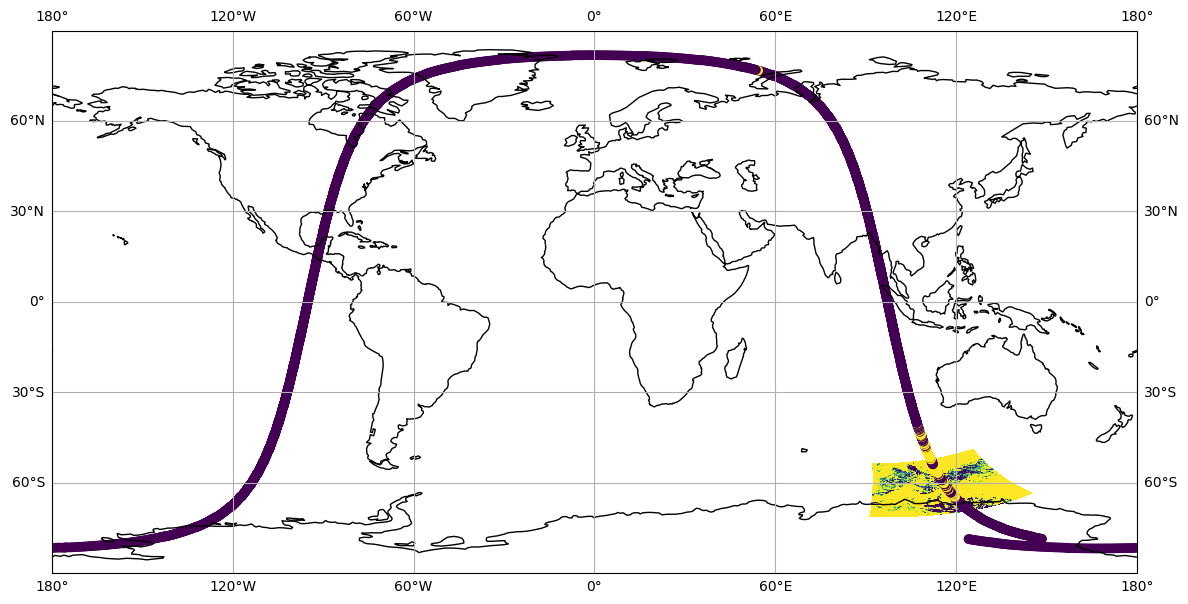

In [5]:
fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree())
ax.scatter(alon,alat, c=achi, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

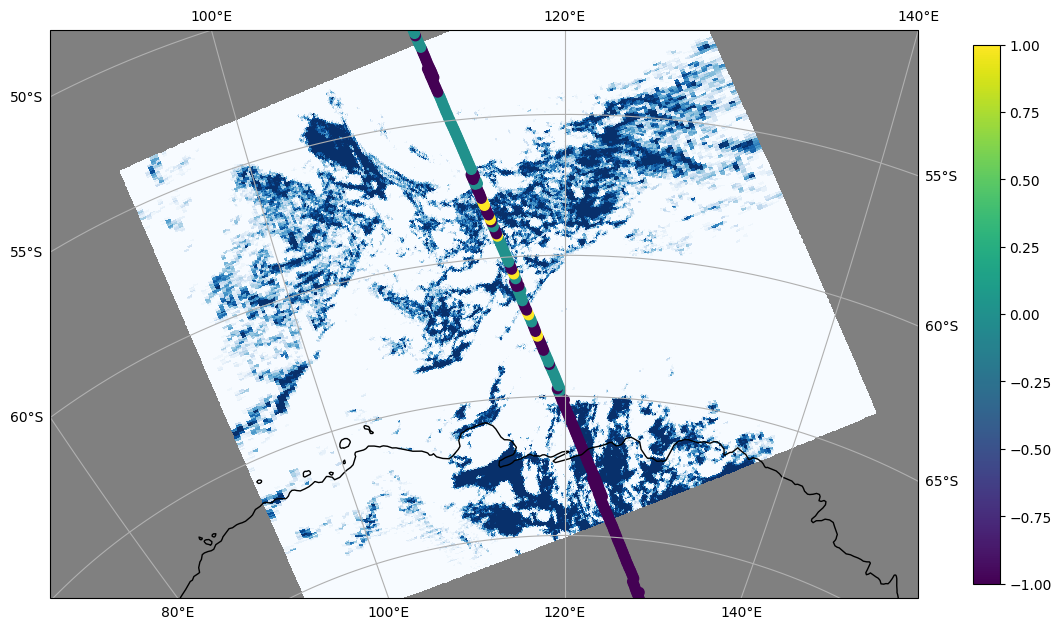

In [6]:
fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([90,140,-70,-50])


ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax.scatter(alon,alat, c=success_flag, transform=ccrs.PlateCarree(), cmap='viridis', s=50)


ax.coastlines()
ax.gridlines(draw_labels=True)
plt.colorbar(mappable=c, shrink=0.7)
plt.show()

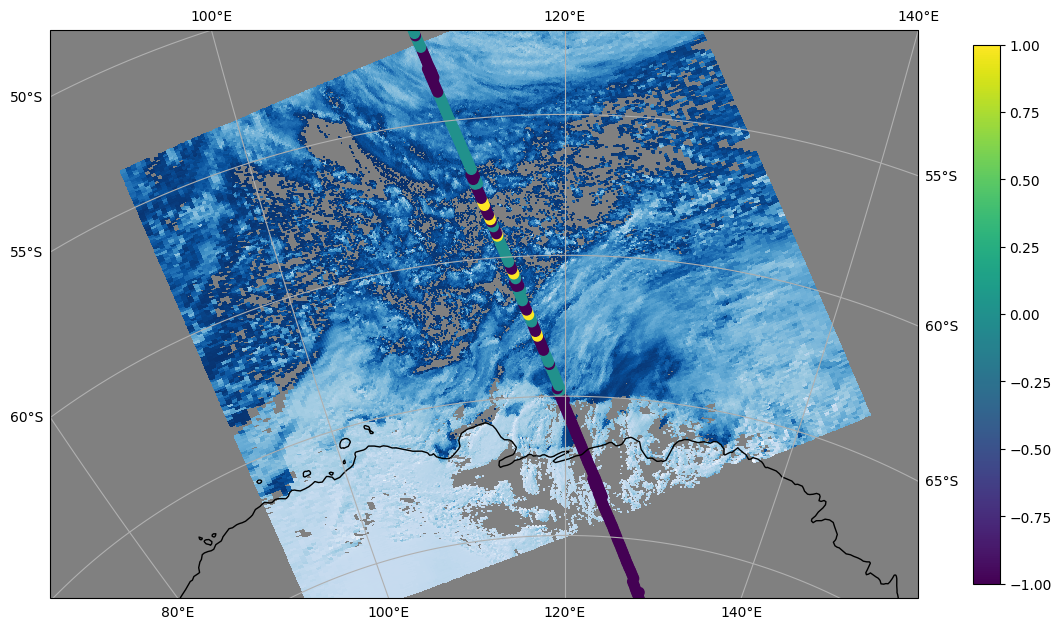

In [7]:
fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([90,140,-70,-50])


ax.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax.scatter(alon,alat, c=success_flag, transform=ccrs.PlateCarree(), cmap='viridis', s=50)


ax.coastlines()
ax.gridlines(draw_labels=True)
plt.colorbar(mappable=c, shrink=0.7)
plt.show()

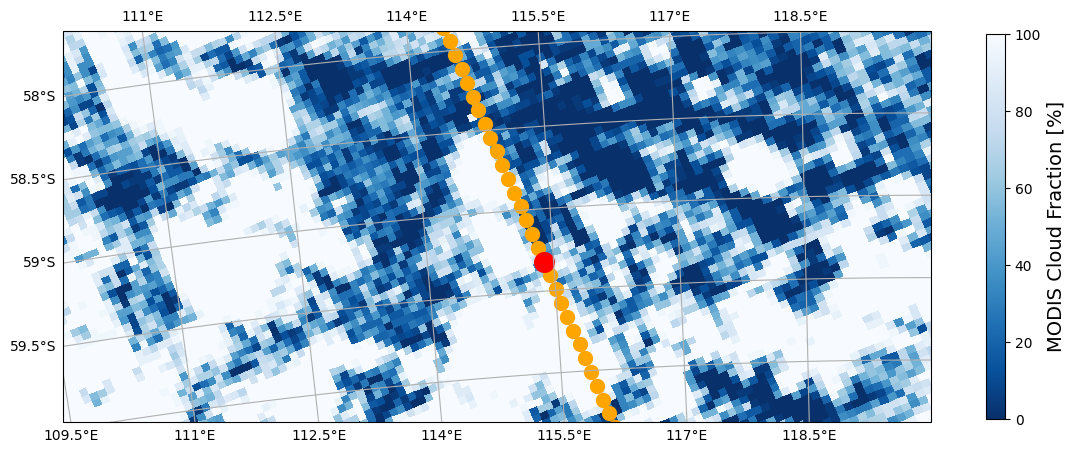

In [8]:
#------------------------------------
#
#    Inhomogeneous stretch
#
#------------------------------------

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([110,120,-60,-58])


b = ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
# c = ax.scatter(alon[200:400],alat[200:400], c=success_flag[200:400], 
#                transform=ccrs.PlateCarree(), cmap='viridis', s=100)
c = ax.scatter(alon[200:400], alat[200:400], c='orange', s=100, 
               transform=ccrs.PlateCarree(), label='A2CS Retrieval Points')

ax.scatter(alon[261],alat[261], transform=ccrs.PlateCarree(), s=200, color='r', label='Pixel of interest')


ax.coastlines()
gridlines = ax.gridlines(draw_labels=True)
gridlines.right_labels = False
colorbar = plt.colorbar(mappable=b, shrink=0.5)
colorbar.set_label('MODIS Cloud Fraction [%]', fontsize=14)
#plt.legend()
plt.show()

In [9]:
#---Get coincident cloudsat data:

csat_rp_file = '/edata2/spencer/cloudsat/2C-RAIN-PROFILE.P1_R05_nc4/\
201501/20150101/2015001062814_46167_CS_2C-RAIN-PROFILE_GRANULE_P1_R05_E06_F00.nc4'

csat_geo_file = '/edata2/spencer/cloudsat/2B-GEOPROF.P1_R05_nc4/201501/\
20150101/2015001062814_46167_CS_2B-GEOPROF_GRANULE_P1_R05_E06_F00.nc4'

with xr.open_dataset(csat_geo_file) as f:
    csat_lat = f.latitude.values
    csat_lon = f.longitude.values
    csat_mcf = f.modis_cloud_flag.values
    csat_refl = f.radar_reflectivity.values / 100.
    csat_hgt  = f.height.values

In [10]:
center = 12362
beg = center-15
end = center+15

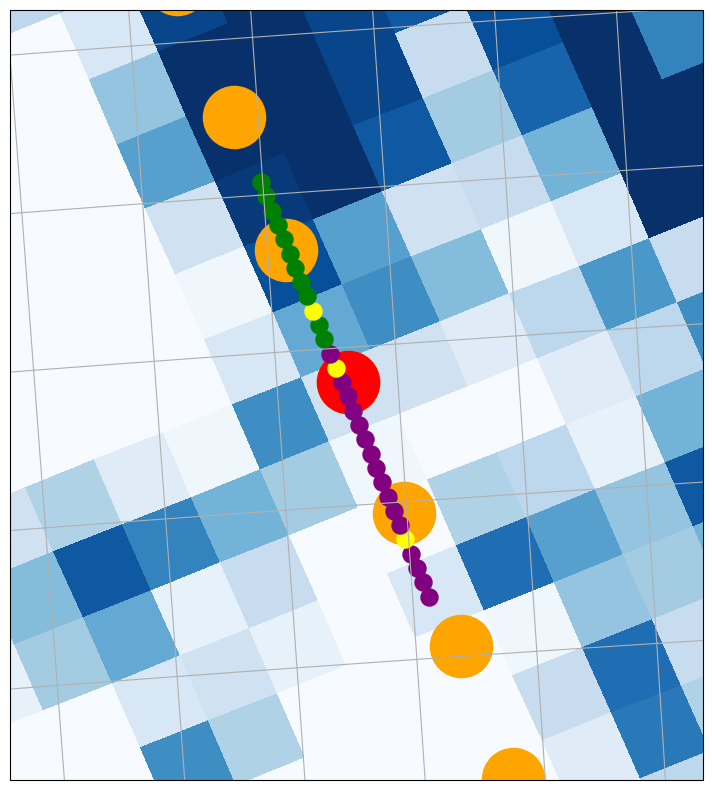

-59.321537 115.38768


In [11]:
fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([115,115.8,-59.56,-59.1])


b = ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
# c = ax.scatter(alon[200:400],alat[200:400], c=success_flag[200:400], 
#                transform=ccrs.PlateCarree(), cmap='viridis', s=100)
c = ax.scatter(alon[200:400], alat[200:400], c='orange', s=2000, 
               transform=ccrs.PlateCarree(), label='A2CS Retrieval Points')

ax.scatter(alon[261],alat[261], transform=ccrs.PlateCarree(), s=2000, color='r', label='Pixel of interest')
# ax.scatter(csat_lon[12362-15:12362+15], csat_lat[12362-15:12362+15], transform=ccrs.PlateCarree(), s=150,
#           c=csat_mcf[12362-15:12362+15], cmap='jet')

for i in np.arange(12362-15,12362+15):
    if csat_mcf[i] == 1: color='g'
    if csat_mcf[i] == 2: color='yellow'
    if csat_mcf[i] == 3: color='purple'
    ax.scatter(csat_lon[i], csat_lat[i], transform=ccrs.PlateCarree(), s=150,
               c=color)

# ax.scatter(115.326664, -59.214379, transform=ccrs.PlateCarree(), color='g')
# ax.scatter(115.514022, -59.295727, transform=ccrs.PlateCarree(), color='g')

# for i in np.arange(250,270):
#     ell = Ellipse(xy=(alon[i],alat[i]), width=0.26, height=0.27, 
#                         edgecolor='r', fc='None', lw=2, angle=55,
#                   transform=ccrs.PlateCarree())
#     ax.add_patch(ell)


ax.coastlines()
gridlines = ax.gridlines(draw_labels=False)
# gridlines.right_labels = False
# gridlines.left_labels = False
# gridlines.top_labels = False
# gridlines.bottom_labels=False
#colorbar = plt.colorbar(mappable=b, shrink=0.5)
#colorbar.set_label('MODIS Cloud Fraction [%]', fontsize=14)
#plt.legend()
plt.show()
print(alat[261], alon[261])

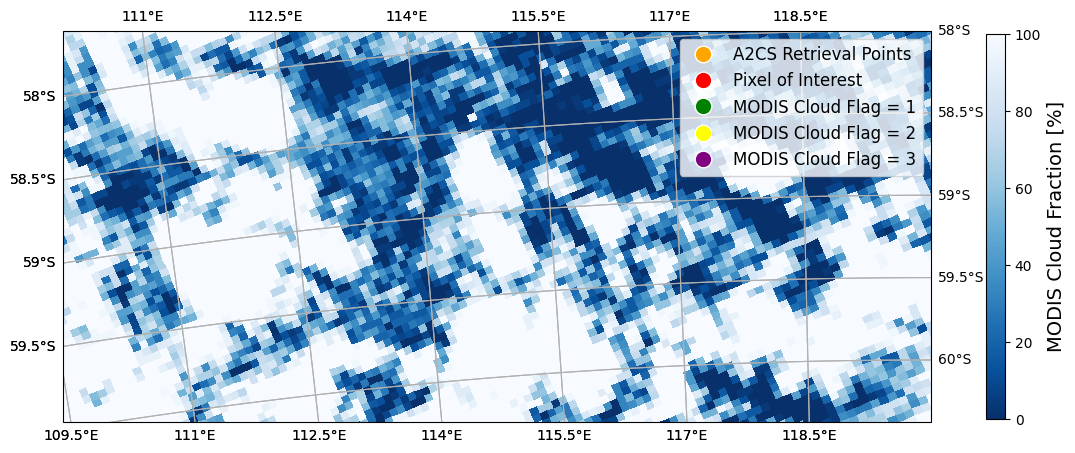

In [12]:
fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([110,120,-60,-58])


b = ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
# c = ax.scatter(alon[200:400],alat[200:400], c=success_flag[200:400], 
#                transform=ccrs.PlateCarree(), cmap='viridis', s=100)
# c = ax.scatter(alon[200:400], alat[200:400], c='orange', s=100, 
#                transform=ccrs.PlateCarree(), label='A2CS Retrieval Points')

# ax.scatter(alon[261],alat[261], transform=ccrs.PlateCarree(), s=200, color='r', label='Pixel of interest')

# for i in np.arange(12362-15,12362+15):
#     if csat_mcf[i] == 1: color='g'
#     if csat_mcf[i] == 2: color='yellow'
#     if csat_mcf[i] == 3: color='purple'
#     ax.scatter(csat_lon[i], csat_lat[i], transform=ccrs.PlateCarree(), s=150,
#                c=color)


# ax.coastlines()
gridlines = ax.gridlines(draw_labels=True)
# gridlines.right_labels = False
# colorbar = plt.colorbar(mappable=b, shrink=0.5)
# colorbar.set_label('MODIS Cloud Fraction [%]', fontsize=14)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='g', markersize=15),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]

legend_elements = [Line2D([0],[0], marker='o', markerfacecolor='orange', 
                          color='w', label='A2CS Retrieval Points', linestyle='None', markersize=12),
                   Line2D([0],[0], marker='o', markerfacecolor='red',
                          color='w', label='Pixel of Interest', linestyle='None', markersize=12),
                   Line2D([0],[0], marker='o', markerfacecolor='g', 
                          color='w', label='MODIS Cloud Flag = 1', linestyle='None', markersize=12),
                   Line2D([0],[0], marker='o', markerfacecolor='yellow', 
                          color='w', label='MODIS Cloud Flag = 2', linestyle='None', markersize=12),
                   Line2D([0],[0], marker='o', markerfacecolor='purple', 
                          color='w', label='MODIS Cloud Flag = 3', linestyle='None', markersize=12)]
ax.legend(handles=legend_elements, fontsize=12)
gridlines = ax.gridlines(draw_labels=True)
gridlines.right_labels = False
colorbar = plt.colorbar(mappable=b, shrink=0.5)
colorbar.set_label('MODIS Cloud Fraction [%]', fontsize=14)
plt.show()

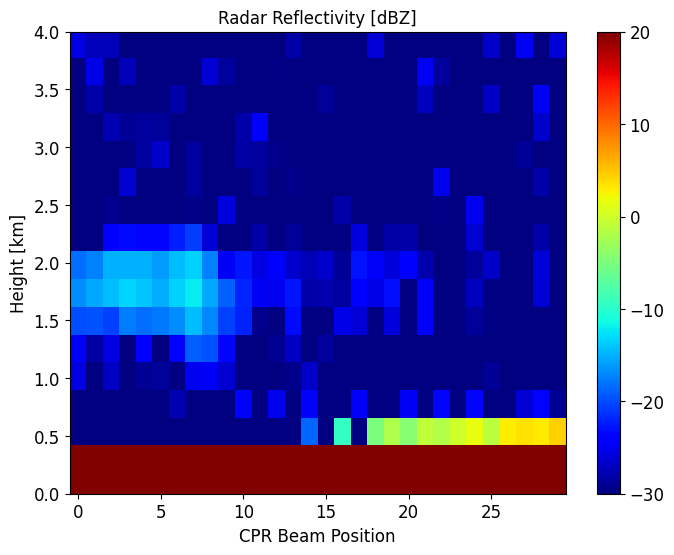

In [13]:
plt.figure(figsize=[8,6])

plt.tick_params('both', labelsize=12)

plt.pcolormesh(np.arange(0,30), csat_hgt[beg]/1000, csat_refl[beg:end].T,
              vmin=-30, vmax=20, cmap='jet')
plt.ylim(0,4)
plt.ylabel('Height [km]', fontsize=12)
plt.xlabel('CPR Beam Position', fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize='large')
plt.title('Radar Reflectivity [dBZ]', fontsize=12)
plt.show()

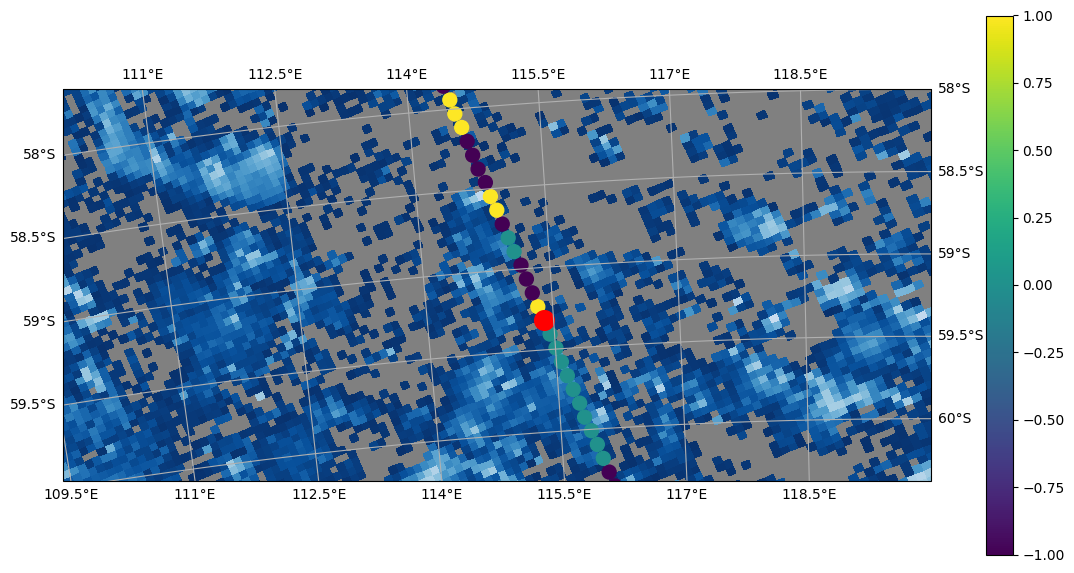

In [14]:
#------------------------------------
#
#    Inhomogeneous stretch
#
#------------------------------------

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([110,120,-60,-58])


ax.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax.scatter(alon[200:400],alat[200:400], c=success_flag[200:400], 
               transform=ccrs.PlateCarree(), cmap='viridis', s=100)

ax.scatter(alon[261],alat[261], transform=ccrs.PlateCarree(), s=200, color='r')


ax.coastlines()
ax.gridlines(draw_labels=True)
plt.colorbar(mappable=c, shrink=0.7)
plt.show()

In [15]:
#---Look at modis cloud flag for cloudsat obs:

pp_dir = '/edata2/spencer/OE/amsr2_radar/outputs/preprocessor/'
gran   = file.split('/')[-1].split('.')[-2].split('_')[0]
pp_file = glob.glob(f'{pp_dir}{cdate[:-2]}/{cdate}/AMSR2.CSAT.{cdate}.{gran}.pp')[0]

print(pp_file)


pp_data = read_pp(pp_file)

pp_lat = pp_data['lats']
pp_lon = pp_data['lons']
modis_cf = pp_data['modiscf']

print(modis_cf[261])


/edata2/spencer/OE/amsr2_radar/outputs/preprocessor/201501/20150101/AMSR2.CSAT.20150101.013962.pp
[3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 1 1 2 1 1 1 1 1 1 1 1 1 1]


In [17]:
file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_oepix_inhomo.bin'

nlyrs = 30

nn   = 25

n = {}
Fout = {}
Fout_post = {}
x2 = {}
xnext = {}
K = {}
sx_i = {}
sx   = {}
chisqtot = {}
chisq = {}
disq = {}

with open(file, 'rb') as f:
    oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
    psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
    xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
    mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
    peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
    y       = np.fromfile(f, sep='', count=nobs, dtype='f')
    frzl    = np.fromfile(f, sep='', count=1, dtype='f')
    frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    for i in np.arange(0,nn):
        try:
            n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
        except:
            print(f'End of file at iteration {i}')
            break
            
        x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
        Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
        sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
        chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        if i > 0:
            disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
            iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]
  
        
        
        
last = i
print('Pixel: ', oepix)
print('Converged at iteration: ', iter_mincost)

End of file at iteration 6
Pixel:  262
Converged at iteration:  2


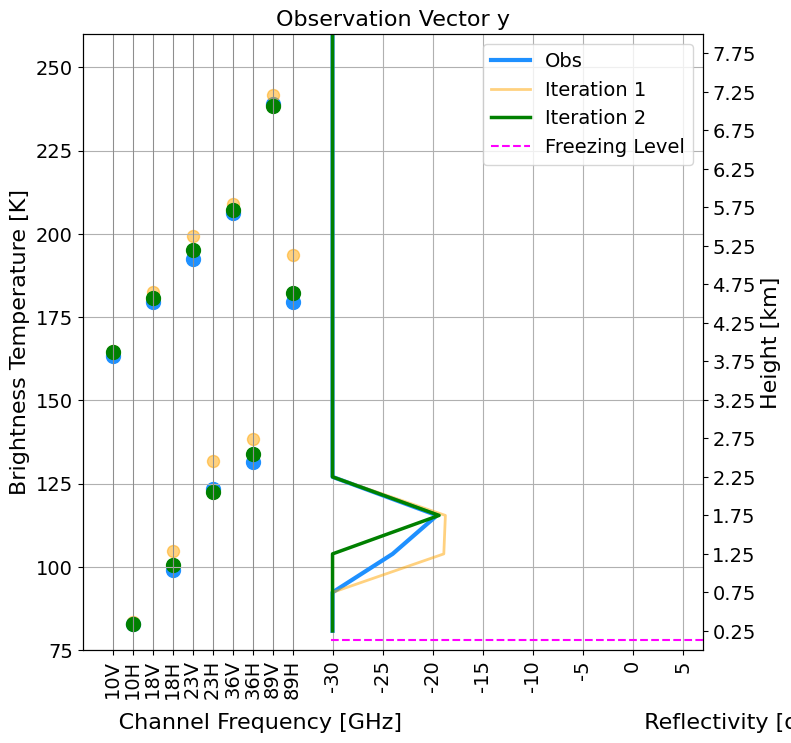

In [23]:
hgt = np.arange(14500,-500,-500) + 250


fig = plt.figure(figsize=[8,8])

ax1 = plt.subplot(1,1,1)
ax2 = plt.twinx()

last = iter_mincost

#Tbs
ax1.scatter(np.arange(-52,-32,2),y[0:10],s=100,label='Obs', color='dodgerblue')
alpha = 0
color='orange'
size = 75
for i in np.arange(0,iter_mincost):
    alpha = alpha + 1./last
    if i == iter_mincost - 1:
        color='green'
        alpha=1.
        size = 100
    ax1.scatter(np.arange(-52,-32,2), Fout[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
               label=f'Iteration {i+1}', s=size)
    
#Reflectivities
ax2.plot(y[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
alpha = 0
color='orange'
linewidth=2
for i in np.arange(0,iter_mincost):
    alpha = alpha + 1./last
    if i == iter_mincost - 1:
        color ='green'
        alpha = 1.
        linewidth=2.5
    ax2.plot(Fout[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')



ax2.set_yticks(hgt,hgt/1000.)
ax2.set_ylim(0,8000)

ax1.tick_params('both', labelsize=14)
ax2.tick_params('both', labelsize=14)

xlabels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H',
              '-30', '-25', '-20', '-15', '-10', '-5', '0', '5' ]

ax1.set_xticks([-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-30,-25,-20,-15,-10,-5,0,5],
               xlabels,
               rotation=90)





for i in np.arange(-52,-32,2): ax1.axvline(i, color='gray', linewidth=0.5)
    
ax2.axhline(frzl, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)



ax1.grid()
ax1.set_xlabel('     Channel Frequency [GHz]                                  Reflectivity [dBZ]',
               fontsize=16, labelpad=10, loc='left')
ax1.set_ylabel('Brightness Temperature [K]', fontsize=16)
ax2.set_ylabel('Height [km]', fontsize=16)
plt.title('Observation Vector y', fontsize=16)
ax2.set_xlim(-55,7)
ax1.set_ylim(75,260)
ax2.legend(fontsize=14)
plt.show()

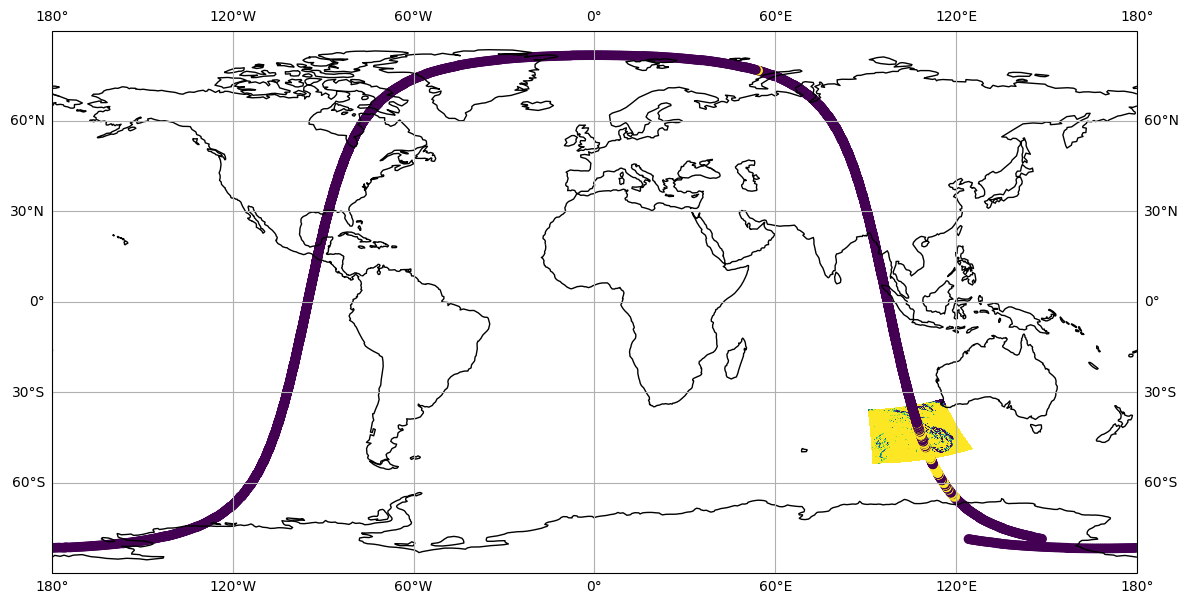

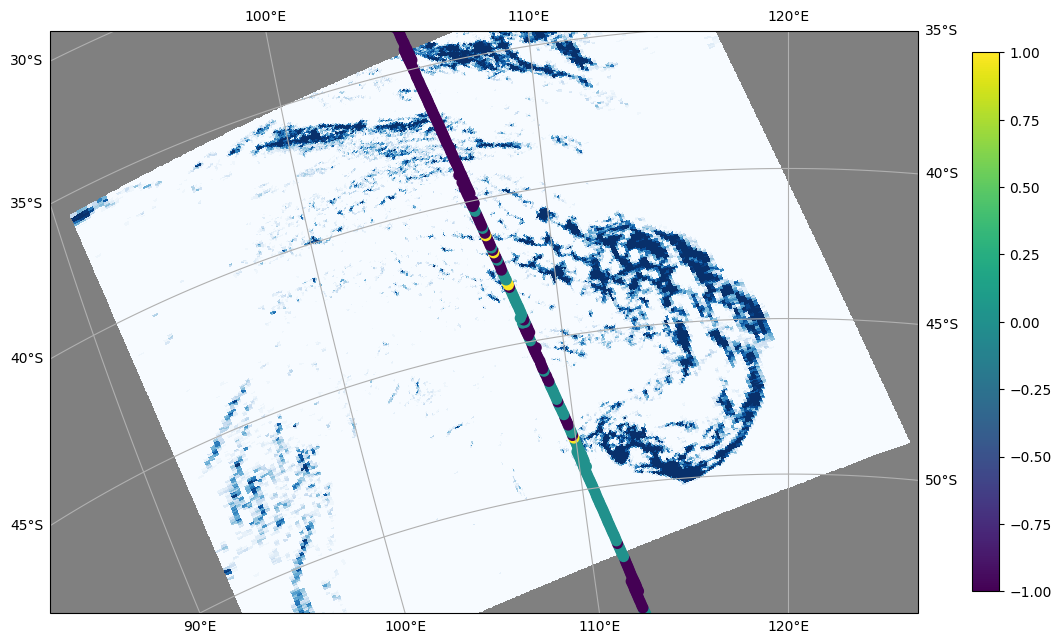

In [24]:
#-------------------------------------------
#
#   Homogeneous strech
#
#-------------------------------------------

modis_file = '/edata2/spencer/MODIS/MYD06_L2.A2015001.0700.061.2018047190650.hdf'

hdf = SD(modis_file, SDC.READ)
mlat = hdf.select('Latitude')[:]
mlon = hdf.select('Longitude')[:]
cfrac = hdf.select('Cloud_Fraction')[:]
cref  = hdf.select('Atm_Corr_Refl')[:,:,0] * 1.0e-04 #0.65um
cref[np.where(cref < 0.)] = np.nan

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree())
ax.scatter(alon,alat, c=achi, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([90,125,-50,-35])


ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax.scatter(alon,alat, c=success_flag, transform=ccrs.PlateCarree(), cmap='viridis', s=50)


ax.coastlines()
ax.gridlines(draw_labels=True)
plt.colorbar(mappable=c, shrink=0.7)
plt.show()

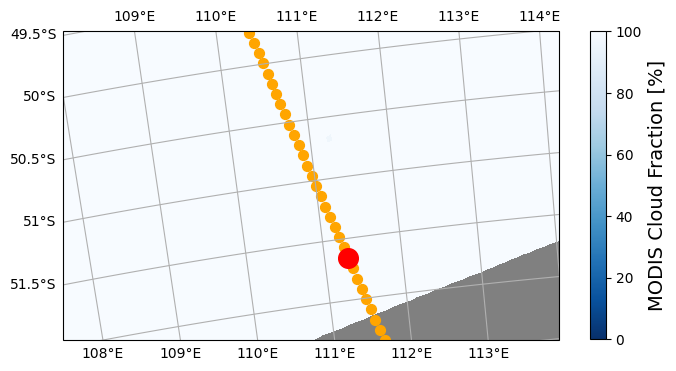

In [25]:



fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                    facecolor='gray')

ax.set_extent([108,114,-52,-50])


b = ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
#ax.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax.scatter(alon,alat, c='orange', transform=ccrs.PlateCarree(), s=50)

ax.scatter(alon[358],alat[358], transform=ccrs.PlateCarree(), s=200, color='r')

ax.coastlines()
gridlines = ax.gridlines(draw_labels=True)
gridlines.right_labels=False

cb = plt.colorbar(mappable=b, shrink=0.50)
cb.set_label('MODIS Cloud Fraction [%]', fontsize=14)
plt.show()

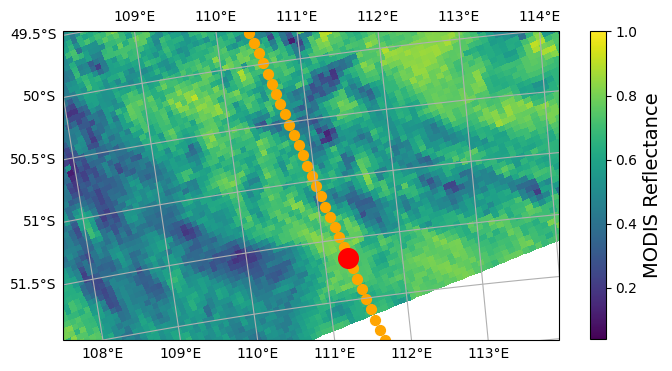

In [26]:

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1,1,1, 
                     projection=ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60))

ax.set_extent([108,114,-52,-50])


#ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
a = ax.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='viridis',
                 vmax=1.0)
c = ax.scatter(alon,alat, c='orange', transform=ccrs.PlateCarree(), s=50)

ax.scatter(alon[358],alat[358], transform=ccrs.PlateCarree(), s=200, color='r')

ax.coastlines()
gridlines = ax.gridlines(draw_labels=True)
gridlines.right_labels=False

cb = plt.colorbar(mappable=a, shrink=0.50)
cb.set_label('MODIS Reflectance', fontsize=14)
plt.show()


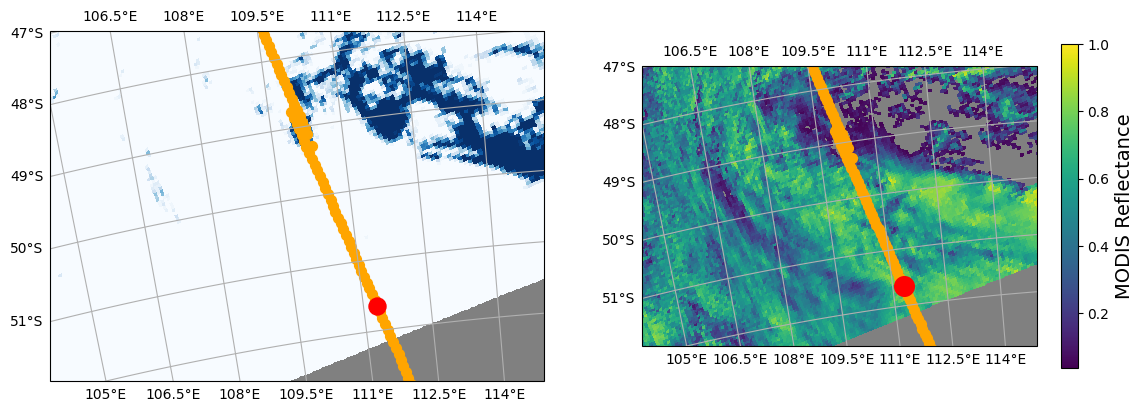

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=[14,6],
            subplot_kw={'projection': ccrs.NearsidePerspective(central_longitude=120, central_latitude=-60),
                        'facecolor': 'gray'},)

ax1 = ax[0]
ax2 = ax[1]


ax1.set_extent([105,115,-52,-48])


b = ax1.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
#ax.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='Blues_r')
c = ax1.scatter(alon,alat, c='orange', transform=ccrs.PlateCarree(), s=50)

ax1.scatter(alon[358],alat[358], transform=ccrs.PlateCarree(), s=150, color='r')

ax1.coastlines()
gridlines = ax1.gridlines(draw_labels=True)
gridlines.right_labels=False






ax2.set_extent([105,115,-52,-48])


#ax.pcolormesh(mlon,mlat,cfrac, transform=ccrs.PlateCarree(), cmap='Blues_r')
a = ax2.pcolormesh(mlon,mlat,cref[::5,0:-5:5], transform=ccrs.PlateCarree(), cmap='viridis',
                 vmax=1.0)
c = ax2.scatter(alon,alat, c='orange', transform=ccrs.PlateCarree(), s=50)

ax2.scatter(alon[358],alat[358], transform=ccrs.PlateCarree(), s=200, color='r')

ax2.coastlines()
gridlines = ax2.gridlines(draw_labels=True)
gridlines.right_labels=False

cb = plt.colorbar(mappable=a, shrink=0.7)
cb.set_label('MODIS Reflectance', fontsize=14)


plt.show()


In [28]:
file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_oepix_homo.bin'

nlyrs = 30

nn   = 25

n = {}
Fout = {}
Fout_post = {}
x2 = {}
xnext = {}
K = {}
sx_i = {}
sx   = {}
chisqtot = {}
chisq = {}
disq = {}

with open(file, 'rb') as f:
    oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
    psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
    xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
    mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
    peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
    y       = np.fromfile(f, sep='', count=nobs, dtype='f')
    frzl    = np.fromfile(f, sep='', count=1, dtype='f')
    frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    for i in np.arange(0,nn):
        try:
            n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
        except:
            print(f'End of file at iteration {i}')
            break
            
        x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
        Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
        sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
        chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        if i > 0:
            disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
            iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]
  
        
        
        
last = i
print('Pixel: ', oepix)
print('Converged at iteration: ', iter_mincost)

End of file at iteration 6
Pixel:  359
Converged at iteration:  4


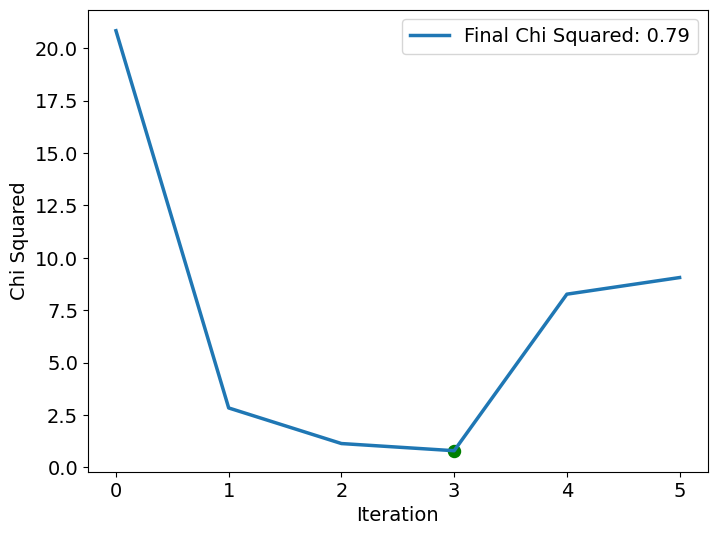

In [33]:
plt.figure(figsize=[8,6])
final_chi = np.round(chisq[f'chisq_{iter_mincost}'][0], decimals=2)
plt.plot(np.arange(0,last), [chisq[f'chisq_{i+1}'] for i in np.arange(0,last)],
         linewidth=2.5, label=f'Final Chi Squared: {str(final_chi)}')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Chi Squared', fontsize=14)
plt.tick_params('both', labelsize=14)
plt.scatter(iter_mincost-1, chisq[f'chisq_{iter_mincost}'], s=75, color='g')
plt.legend(fontsize=14)
plt.show()

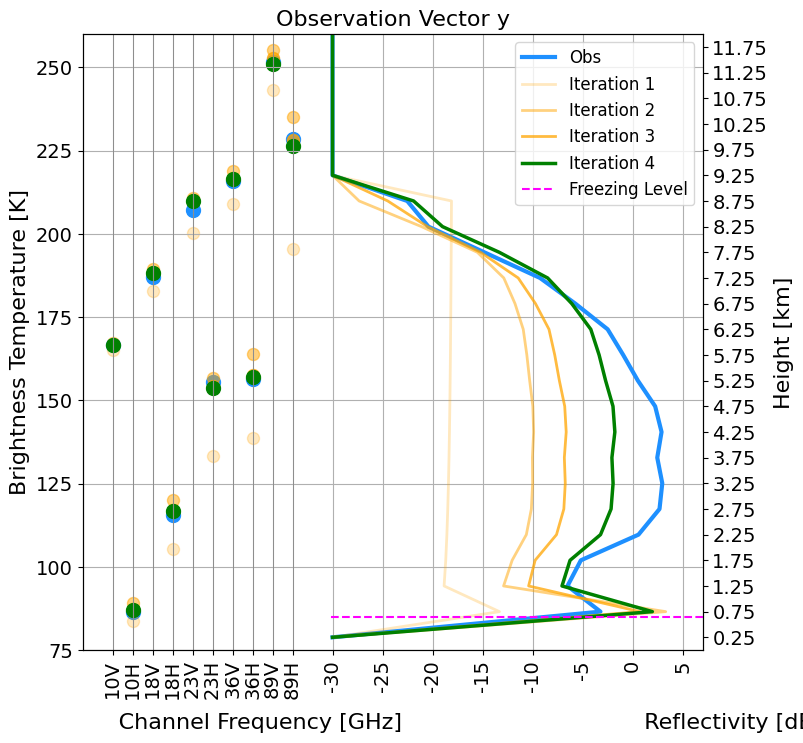

In [34]:
hgt = np.arange(14500,-500,-500) + 250


fig = plt.figure(figsize=[8,8])

ax1 = plt.subplot(1,1,1)
ax2 = plt.twinx()

last = iter_mincost

#Tbs
ax1.scatter(np.arange(-52,-32,2),y[0:10],s=100,label='Obs', color='dodgerblue')
alpha = 0
color='orange'
size = 75
for i in np.arange(0,iter_mincost):
    alpha = alpha + 1./last
    if i == iter_mincost - 1:
        color='green'
        alpha=1.
        size = 100
    ax1.scatter(np.arange(-52,-32,2), Fout[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
               label=f'Iteration {i+1}', s=size)
    
#Reflectivities
ax2.plot(y[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
alpha = 0
color='orange'
linewidth=2
for i in np.arange(0,iter_mincost):
    alpha = alpha + 1./last
    if i == iter_mincost - 1:
        color ='green'
        alpha = 1.
        linewidth=2.5
    ax2.plot(Fout[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')



ax2.set_yticks(hgt,hgt/1000.)
ax2.set_ylim(0,12000)

ax1.tick_params('both', labelsize=14)
ax2.tick_params('both', labelsize=14)

xlabels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H',
              '-30', '-25', '-20', '-15', '-10', '-5', '0', '5' ]

ax1.set_xticks([-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-30,-25,-20,-15,-10,-5,0,5],
               xlabels,
               rotation=90)





for i in np.arange(-52,-32,2): ax1.axvline(i, color='gray', linewidth=0.5)
    
ax2.axhline(frzl, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)



ax1.grid()
ax1.set_xlabel('     Channel Frequency [GHz]                                  Reflectivity [dBZ]',
               fontsize=16, labelpad=10, loc='left')
ax1.set_ylabel('Brightness Temperature [K]', fontsize=16)
ax2.set_ylabel('Height [km]', fontsize=16)
plt.title('Observation Vector y', fontsize=16)
ax2.set_xlim(-55,7)
ax1.set_ylim(75,260)
ax2.legend(fontsize=12, loc='upper right')
plt.show()

In [39]:
#---Try looking at linearity of Tb vs. clw:

ice_file = '/edata2/spencer/thesis_data/inhomogeneities/simulated_obs_ice.bin'
liq_file = '/edata2/spencer/thesis_data/inhomogeneities/simulated_obs_liq.bin'

with open(ice_file, 'rb') as f:
    nsim_ice = np.fromfile(f, sep='', count=1, dtype='i')[0]
    iwp  = np.fromfile(f, sep='', count=nsim_ice, dtype='f')
    sim_tbs_ice = np.fromfile(f, sep='', count=nsim_ice*10, dtype='f').reshape(10,nsim_ice).T
    sim_refl_ice = np.fromfile(f, sep='', count=nsim_ice*30, dtype='f').reshape(30,nsim_ice).T
    
with open(liq_file, 'rb') as f:
    nsim_liq = np.fromfile(f, sep='', count=1, dtype='i')[0]
    lwp  = np.fromfile(f, sep='', count=nsim_liq, dtype='f')
    sim_tbs_liq = np.fromfile(f, sep='', count=nsim_liq*10, dtype='f').reshape(10,nsim_liq).T
    sim_refl_liq = np.fromfile(f, sep='', count=nsim_liq*30, dtype='f').reshape(30,nsim_liq).T


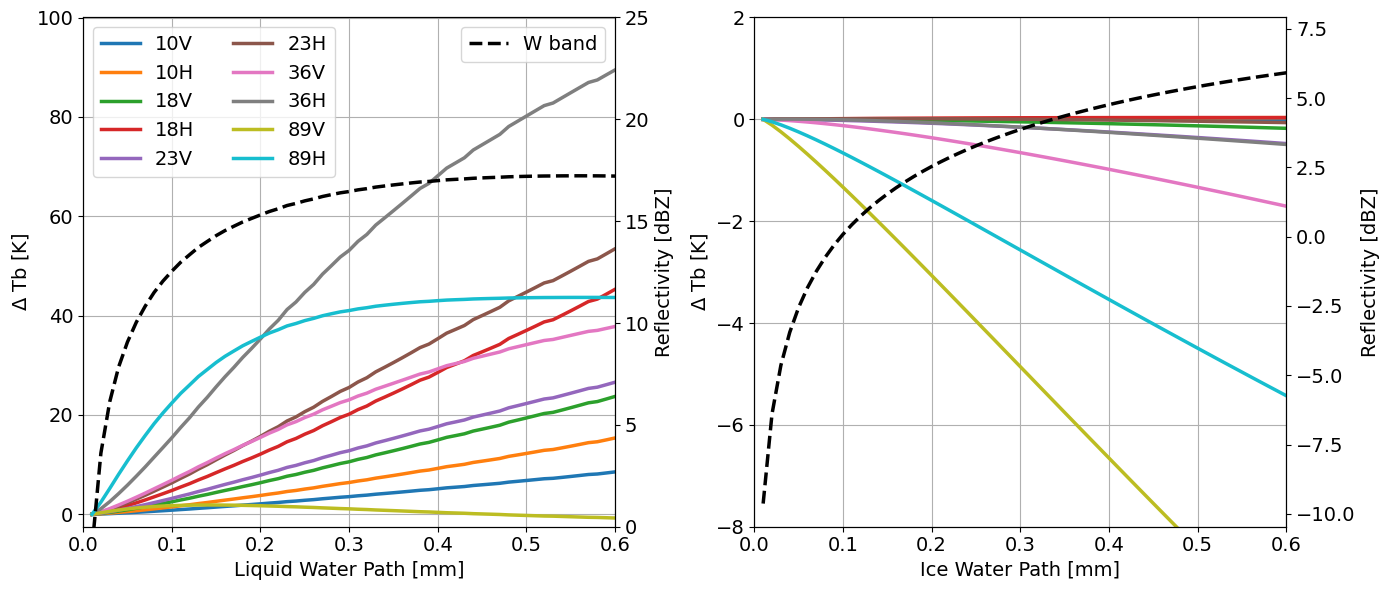

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,6], tight_layout=True)

labels=['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H']

colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
        'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

ax1 = ax[0]
ax2 = ax[1]

ax3 = ax1.twinx()
ax4 = ax2.twinx()

for i in np.arange(0,10):
    color = colors[i]
    ax2.plot(iwp, sim_tbs_ice[:,i] - sim_tbs_ice[0,i], linewidth=2.5, color=color, label=labels[i])
    ax1.plot(lwp, sim_tbs_liq[:,i] - sim_tbs_liq[0,i], linewidth=2.5, color=color, label=labels[i])
    
    
ax4.plot(iwp, sim_refl_ice[:,-6], color='k', linewidth=2.5, linestyle='--', label='W band')
ax3.plot(lwp, sim_refl_liq[:,-6], color='k', linewidth=2.5, linestyle='--', label='W band')
    
    
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
ax3.tick_params(axis='both', labelsize=14)
ax4.tick_params(axis='both', labelsize=14)
ax1.set_ylabel('$\Delta$ Tb [K]', fontsize=14)
ax2.set_ylabel('$\Delta$ Tb [K]', fontsize=14)
ax1.set_xlabel('Liquid Water Path [mm]', fontsize=14)
ax2.set_xlabel('Ice Water Path [mm]', fontsize=14)
ax3.set_ylabel('Reflectivity [dBZ]', fontsize=14)
ax4.set_ylabel('Reflectivity [dBZ]', fontsize=14)

ax1.set_xlim(0,0.6)
ax2.set_xlim(0,0.6)
ax1.set_ylim(-2.5,100)
ax2.set_ylim(-8.,2.0)

ax3.set_ylim(0,25)

ax1.legend(fontsize=14, loc='upper left', ncol=2)
ax3.legend(fontsize=14, loc='upper right')
    
ax1.grid() 
ax2.grid()
plt.show()


In [436]:
#----------------------------------------------
#
# EXPERIMENT WITH HOMOGENEOUS FIELD
#
#----------------------------------------------

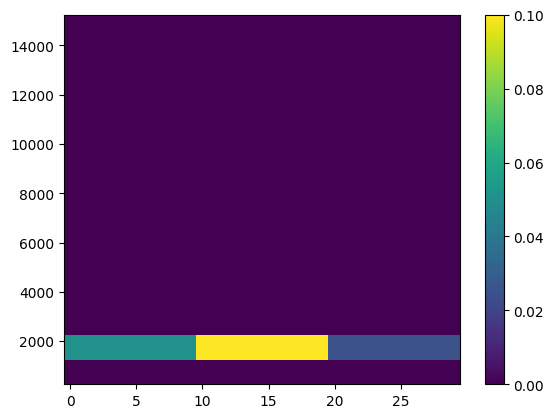

In [444]:
#---Set up synthetic profile:

cloud = np.zeros([30, 30])

#1-3 km is indices: -6 to -2

cloud[0:10, -4:-2] = 0.05
cloud[10:20, -4:-2] = 0.1
cloud[20:30,-4:-2] = 0.025



plt.pcolormesh(np.arange(0,30), hgt, cloud.T)
plt.colorbar()

In [445]:
z_app = np.zeros([30,30])
z_app[:] = -30.

#Get info from forward model:
sfile_025 = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.025.bin'
sfile_05  = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.05.bin'
sfile_25  = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.25.bin'
sfile_1   = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.1.bin'

with open(sfile_025) as f:
    tbs_025 = np.fromfile(f, sep='', count=10, dtype='f')
    za_025  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_025  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_025  = np.fromfile(f, sep='', count=30, dtype='f')
    
with open(sfile_05) as f:
    tbs_05 = np.fromfile(f, sep='', count=10, dtype='f')
    za_05  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_05  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_05  = np.fromfile(f, sep='', count=30, dtype='f')
    
with open(sfile_25) as f:
    tbs_25 = np.fromfile(f, sep='', count=10, dtype='f')
    za_25  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_25  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_25  = np.fromfile(f, sep='', count=30, dtype='f')

with open(sfile_1) as f:
    tbs_1 = np.fromfile(f, sep='', count=10, dtype='f')
    za_1  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_1  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_1  = np.fromfile(f, sep='', count=30, dtype='f')


z_app[0:10,:] = za_05
z_app[10:20,:] = za_1
z_app[20:30,:] = za_025


In [446]:
rr_sfc = np.zeros(30)
rr_sfc[0:10] = rr_05[-3]
rr_sfc[10:20] = rr_1[-3]
rr_sfc[20:30] = rr_025[-3]
print(rr_sfc.mean())

0.21902603656053543


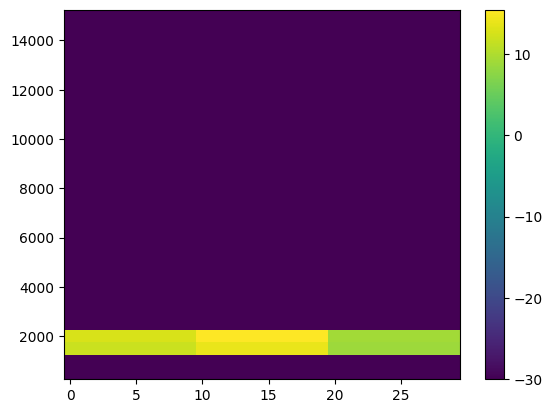

In [447]:
plt.pcolormesh(np.arange(0,30), hgt, z_app.T)
plt.colorbar()

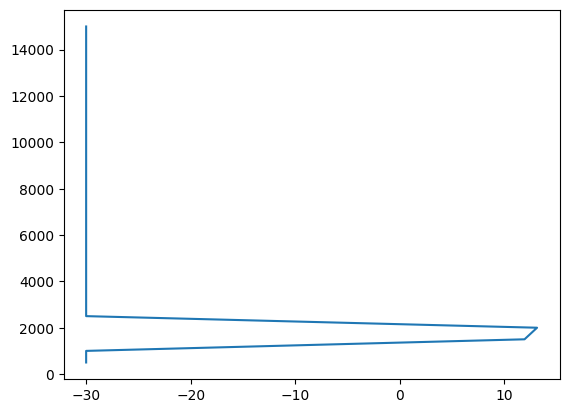

In [448]:
#---Avg to create radar profile:
avg_refl = 10.*np.log10(np.mean(10**(z_app/10.), axis=0))
#avg_refl = np.mean(z_app, axis=0)

plt.plot(avg_refl, hgt)

In [404]:
#---Instead do weighted avg of Tbs:
#Set up Tb array:

full_Tbs = np.zeros([22,14,10])
for i in np.arange(0,10):
    full_Tbs[0:6,:,i] = tbs_025[i]
    full_Tbs[6:16,:,i] = tbs_05[i]
    full_Tbs[16:22,:,i] = tbs_1[i]

#---Do a gaussian-weighted average for Tbs in scene:
along_fov = 22.
across_fov = 14.

sum_wgt = 0.
sum_Tbs = np.zeros(10)

for i in np.arange(0,22):
    for j in np.arange(0,14):
        
        dy = i - (along_fov / 2.)
        dx = j - (across_fov / 2.)
        
        dist = np.sqrt(dx**2 + dy**2)
        
        p = ((dx**2)/(across_fov**2)) + ((dy**2)/(along_fov**2))
        
        wgt = np.exp(-2.7726 * p)
        sum_Tbs = sum_Tbs + (full_Tbs[i,j,:]*wgt)
        sum_wgt += wgt
        
wgt_avg_Tbs = sum_Tbs / sum_wgt



wgt_avg_Tbs, avg_refl

(array([171.3567625 ,  91.71010679, 189.68426413, 119.0477671 ,
        209.76518606, 153.49093787, 215.15696053, 157.56528838,
        249.56091155, 223.46402973]),
 array([-30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        ,  13.12848952,  11.92952823,
        -30.        , -30.        ]))

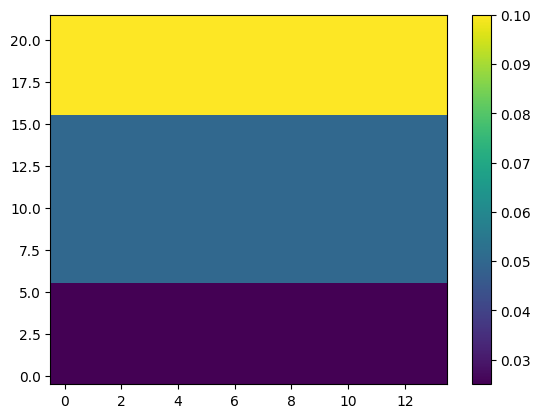

In [406]:
#Create cloud in 2D field for AMSR2 FOV:
full_cloud = np.zeros([22,14,30])

# z_app[0:3,:] = za_025
# z_app[3:6,:] = za_05
# z_app[6:12,:] = za_1
# z_app[12:15,:] = za_05

full_cloud[0:6,:,-4:-2] = 0.025
full_cloud[6:16,:,-4:-2] = 0.05
full_cloud[16:22,:,-4:-2] = 0.1


plt.pcolormesh(np.arange(0,14), np.arange(0,22), full_cloud[:,:,-4])
plt.colorbar()

In [407]:
#---Do a gaussian-weighted average for cloud water in scene to use later:
along_fov = 22.
across_fov = 14.

sum_wgt = 0.
sum_clw = np.zeros(30)

for i in np.arange(0,22):
    for j in np.arange(0,14):
        
        dy = i - (along_fov / 2.)
        dx = j - (across_fov / 2.)
        
        dist = np.sqrt(dx**2 + dy**2)
        
        p = ((dx**2)/(across_fov**2)) + ((dy**2)/(along_fov**2))
        
        wgt = np.exp(-2.7726 * p)
        sum_clw = sum_clw + (full_cloud[i,j,:]*wgt)
        sum_wgt += wgt
        
wgt_avg_cloud = sum_clw / sum_wgt

print('Gaussian weighted avg cloud: ', wgt_avg_cloud)

Gaussian weighted avg cloud:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05658026 0.05658026 0.         0.        ]


In [411]:
#---Get simulated passive Tbs:

sfile_pas   = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_pasTbs.bin'

with open(sfile_pas) as f:
    tbs_pas = np.fromfile(f, sep='', count=10, dtype='f')
    za_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    
    
print('PMW simulated obs and mean reflectivity:')

tbs_pas, za_pas

PMW simulated obs and mean reflectivity:


(array([171.34015,  91.67971, 189.63339, 118.94943, 209.71094, 153.38007,
        215.11957, 157.45584, 249.68515, 224.121  ], dtype=float32),
 array([-30.      , -30.      , -30.      , -30.      , -30.      ,
        -30.      , -30.      , -30.      , -30.      , -30.      ,
        -30.      , -30.      , -30.      , -30.      , -30.      ,
        -30.      , -30.      , -30.      , -30.      , -30.      ,
        -30.      , -30.      , -30.      , -30.      , -30.      ,
        -30.      ,  13.242682,  12.293745, -30.      , -30.      ],
       dtype=float32))

In [412]:
file = '/edata2/spencer/thesis_data/beam_filling/OE_amsr2_cloudsat_final/test_oepix.bin'

nlyrs = 30

nn   = 25

n = {}
Fout = {}
Fout_post = {}
x2 = {}
xnext = {}
K = {}
sx_i = {}
sx   = {}
chisqtot = {}
chisq = {}
disq = {}
rn_rate = {}
sn_rate = {}

with open(file, 'rb') as f:
    oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
    prcp_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
    snrt_sfc_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
    nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
    psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
    xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
    mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
    peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
    y       = np.fromfile(f, sep='', count=nobs, dtype='f')
    frzl    = np.fromfile(f, sep='', count=1, dtype='f')
    frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    for i in np.arange(0,nn):
        try:
            n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
        except:
            print(f'End of file at iteration {i}')
            break
            
        x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
        Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
        sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
        chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        rn_rate[f'rn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        sn_rate[f'sn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        
        if i > 0:
            disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
            iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]
  
        
        
        
last = i
print('Pixel: ', oepix)
print('Converged at iteration: ', iter_mincost)
print('Sfc precip in: ', prcp_in)
print('Sfc snowfall in: ', snrt_sfc_in)
print('Retrieved sfc precip: ', rn_rate[f'rn_rate_{iter_mincost}'][-1] + sn_rate[f'sn_rate_{iter_mincost}'][-1])

End of file at iteration 7
Pixel:  1
Converged at iteration:  7
Sfc precip in:  0.1
Sfc snowfall in:  0.1
Retrieved sfc precip:  0.2785986


In [413]:
def reconstruct(mrmp, x):
    
    eof_coef = np.zeros([3],dtype='f')
    eof_coef[0] = x[-5]
    eof_coef[1] = x[-4]
    eof_coef[2] = x[-3]
    
    rmix = np.zeros(mrmp.size)
    for i in np.arange(0,mrmp.size):
        rmix[i] = (mrmp[i] + 
                   eof_coef[0] * peofs[i,0] +
                   eof_coef[1] * peofs[i,1] +
                   eof_coef[2] * peofs[i,2])
        
        if rmix[i] < 0.:
            rmix[i] = 0.
    
    return rmix

mixr = {}

for i in np.arange(0,last):
    mixr[f'mixr_{i+1}'] = reconstruct(mrmp, x2[f'x2_{i+1}'])

In [414]:
def cwp2clwc(x, frzl_bin, ct_bin, cb_bin):
    
    cwp = 10**(x[-6])
    
    clwc = np.zeros(nlyrs)
    
#     if frzl_bin >= nlyrs:
#         frzl_bin = nlyrs

    if frzl_bin <= cb_bin:
        clwc[frzl_bin-1:cb_bin+1] = cwp / (cb_bin - frzl_bin + 1) / 500.
    else:
        clwc[:] = 0.
    
    #clwc[frzl_bin-1:] = cwp / (nlyrs - frzl_bin + 1) / 500.
    
    if frzl_bin >= nlyrs:
        clwc[-1] = cwp / 500.
    
    return clwc

clwc = {}

for i in np.arange(0,last):
    clwc[f'clwc_{i+1}'] = cwp2clwc(x2[f'x2_{i+1}'], frzl_bin, cltop_bin, clbot_bin)

In [415]:
plwc = {}
tiwc = {}
for i in np.arange(0,last):
    plwc[f'plwc_{i+1}'] = x2[f'x2_{i+1}'][0:nlyrs]
    tiwc[f'tiwc_{i+1}'] = x2[f'x2_{i+1}'][nlyrs:nlyrs*2]

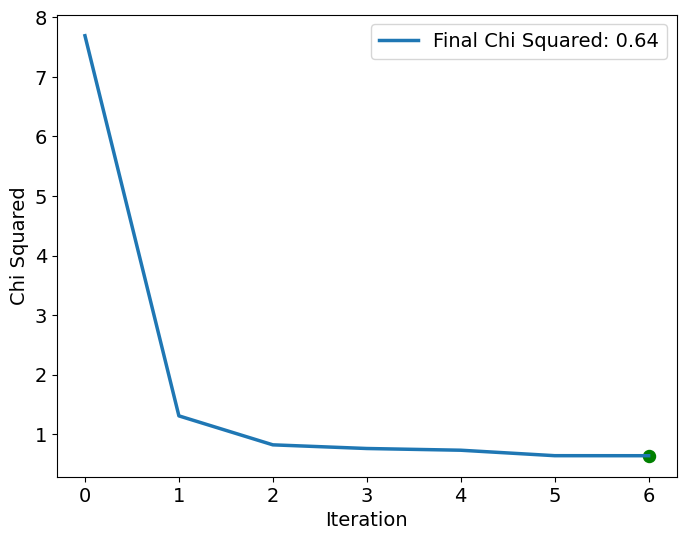

In [419]:
plt.figure(figsize=[8,6])
final_chi = np.round(chisq[f'chisq_{iter_mincost}'][0], decimals=2)
plt.plot(np.arange(0,last), [chisq[f'chisq_{i+1}'] for i in np.arange(0,last)],
         linewidth=2.5, label=f'Final Chi Squared: {str(final_chi)}')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Chi Squared', fontsize=14)
plt.tick_params('both', labelsize=14)
plt.scatter(iter_mincost-1, chisq[f'chisq_{iter_mincost}'], s=75, color='g')
plt.legend(fontsize=14)
plt.show()

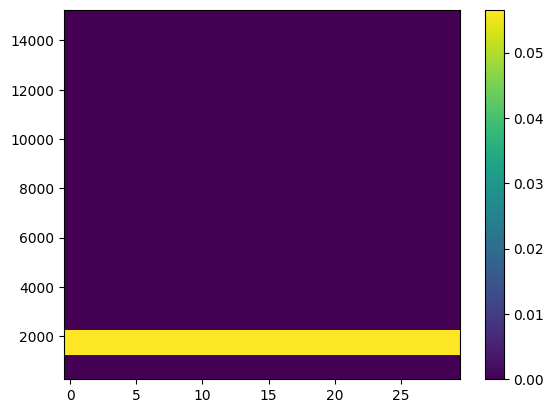

In [420]:
#---Set up synthetic profile now with mean cloud:

cloud = np.zeros([30, 30])

#1-3 km is indices: -6 to -2

cloud[0:10, -4:-2] = 0.025
cloud[10:20, -4:-2] = 0.05
cloud[20:30,-4:-2] = 0.1

cloud[:,-4:-2] = 0.05658

plt.pcolormesh(np.arange(0,30), hgt, cloud.T)
plt.colorbar()

In [421]:
z_app = np.zeros([30,30])
z_app[:] = -30.

#Get info from forward model:
sfile_025 = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.025.bin'
sfile_05  = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.05.bin'
sfile_25  = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.25.bin'
sfile_1   = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_0.1.bin'
sfile_pas = '/edata2/spencer/thesis_data/beam_filling/forward_model/sim_obs_out_pasTbs.bin' #0.05658 gm^-3

with open(sfile_pas) as f:
    tbs_pas = np.fromfile(f, sep='', count=10, dtype='f')
    za_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    rr_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    sr_pas  = np.fromfile(f, sep='', count=30, dtype='f')
    

z_app[0:10,:] = za_025
z_app[10:20,:] = za_05
z_app[20:30,:] = za_1

z_app[:,:] = za_pas


In [422]:
rr_sfc = np.zeros(30)
rr_sfc[0:10] = rr_025[-3]
rr_sfc[10:20] = rr_05[-3]
rr_sfc[20:30] = rr_1[-3]

rr_sfc[:] = rr_pas[-3]

print(rr_sfc.mean())

0.17969942092895508


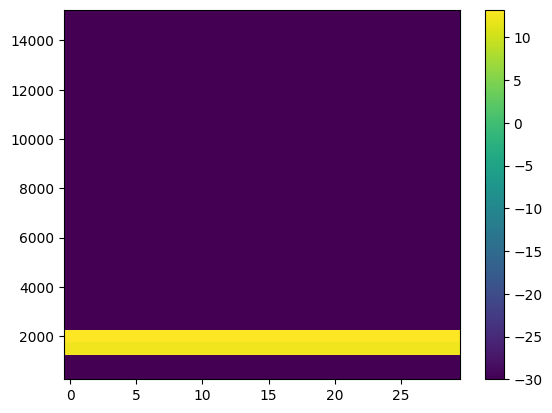

In [423]:
plt.pcolormesh(np.arange(0,30), hgt, z_app.T)
plt.colorbar()

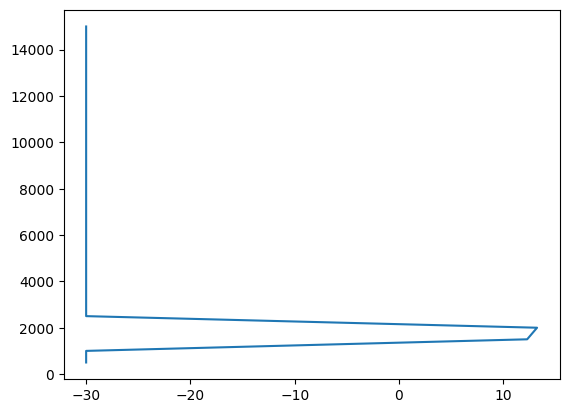

In [424]:
#---Avg to create radar profile:
avg_refl = 10.*np.log10(np.mean(10**(z_app/10.), axis=0))
#avg_refl = np.mean(z_app, axis=0)

plt.plot(avg_refl, hgt)

In [425]:
#---Instead do weighted avg of Tbs:
#Set up Tb array:

full_Tbs = np.zeros([22,14,10])
for i in np.arange(0,10):
    full_Tbs[0:6,:,i] = tbs_025[i]
    full_Tbs[6:16,:,i] = tbs_05[i]
    full_Tbs[16:22,:,i] = tbs_1[i]

#---Do a gaussian-weighted average for Tbs in scene:
along_fov = 22.
across_fov = 14.

sum_wgt = 0.
sum_Tbs = np.zeros(10)

for i in np.arange(0,22):
    for j in np.arange(0,14):
        
        dy = i - (along_fov / 2.)
        dx = j - (across_fov / 2.)
        
        dist = np.sqrt(dx**2 + dy**2)
        
        p = ((dx**2)/(across_fov**2)) + ((dy**2)/(along_fov**2))
        
        wgt = np.exp(-2.7726 * p)
        sum_Tbs = sum_Tbs + (full_Tbs[i,j,:]*wgt)
        sum_wgt += wgt
        
wgt_avg_Tbs = sum_Tbs / sum_wgt



wgt_avg_Tbs, avg_refl

(array([171.3567625 ,  91.71010679, 189.68426413, 119.0477671 ,
        209.76518606, 153.49093787, 215.15696053, 157.56528838,
        249.56091155, 223.46402973]),
 array([-30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        , -30.        , -30.        ,
        -30.        , -30.        ,  13.24268246,  12.29374504,
        -30.        , -30.        ]))

In [ ]:
#---Finally, run retrieval on homogeneous cloud field:

In [428]:
file = '/edata2/spencer/thesis_data/beam_filling/OE_amsr2_cloudsat_final/test_oepix.bin'

nlyrs = 30

nn   = 25

n = {}
Fout = {}
Fout_post = {}
x2 = {}
xnext = {}
K = {}
sx_i = {}
sx   = {}
chisqtot = {}
chisq = {}
disq = {}
rn_rate = {}
sn_rate = {}

with open(file, 'rb') as f:
    oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
    prcp_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
    snrt_sfc_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
    nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
    nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
    psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
    xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
    mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
    peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
    y       = np.fromfile(f, sep='', count=nobs, dtype='f')
    frzl    = np.fromfile(f, sep='', count=1, dtype='f')
    frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
    for i in np.arange(0,nn):
        try:
            n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
        except:
            print(f'End of file at iteration {i}')
            break
            
        x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
        Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
        sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
        chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
        Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
        rn_rate[f'rn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        sn_rate[f'sn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        
        if i > 0:
            disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
            iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]
  
        
        
        
last = i
print('Pixel: ', oepix)
print('Converged at iteration: ', iter_mincost)
print('Sfc precip in: ', prcp_in)
print('Sfc snowfall in: ', snrt_sfc_in)
print('Retrieved sfc precip: ', rn_rate[f'rn_rate_{iter_mincost}'][-1] + sn_rate[f'sn_rate_{iter_mincost}'][-1])

End of file at iteration 7
Pixel:  1
Converged at iteration:  6
Sfc precip in:  0.1
Sfc snowfall in:  0.1
Retrieved sfc precip:  0.2656833


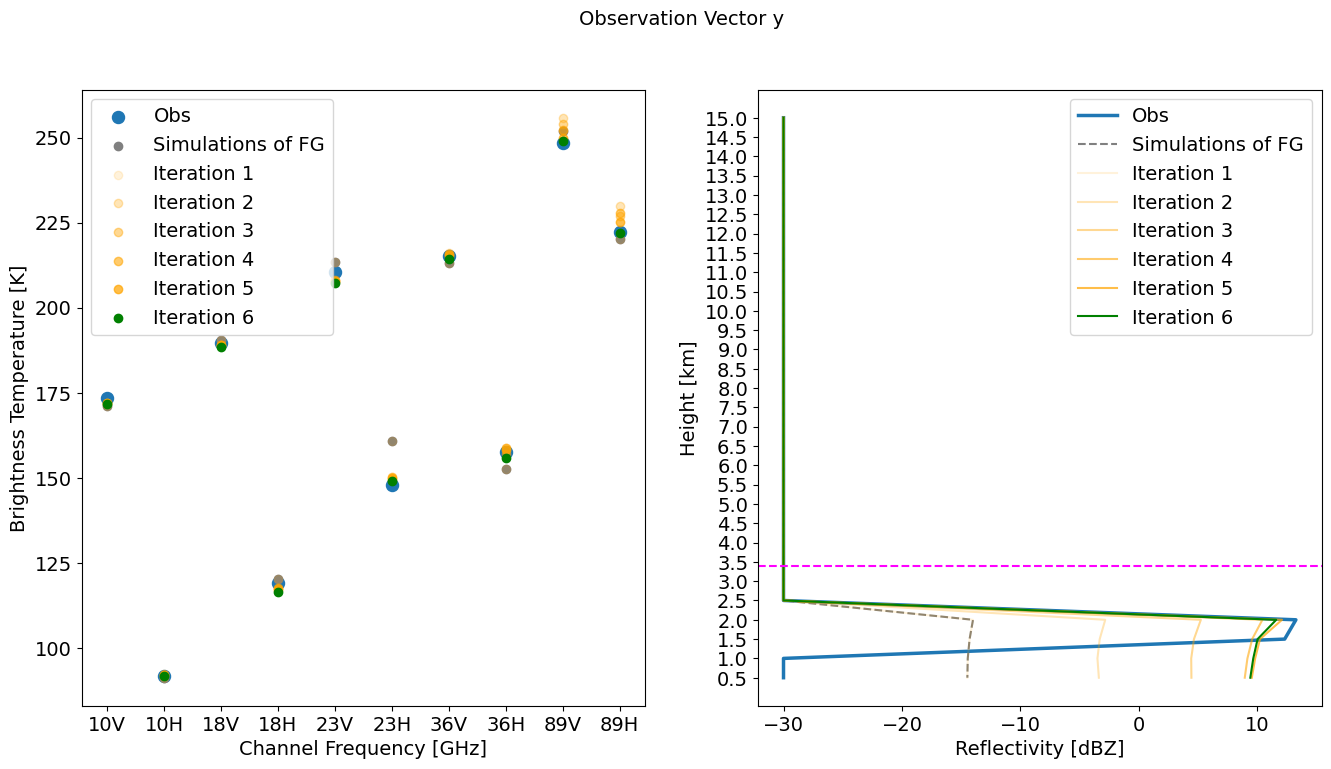

In [434]:
fig = plt.figure(figsize=[16,8])
spec = fig.add_gridspec(1,2)

ax1 = plt.subplot(spec[0,0])
ax2 = plt.subplot(spec[0,1])


ax1.set_xticks(np.arange(0,10), 
               ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H'], fontsize=14)


ax1.tick_params('y', labelsize=14)
ax1.set_ylabel('Brightness Temperature [K]', fontsize=14)
ax1.set_xlabel('Channel Frequency [GHz]', fontsize=14)



ax2.tick_params('both', labelsize=14)
ax2.set_yticks(hgt, hgt/1000.)
ax2.set_ylabel('Height [km]', fontsize=14)
ax2.set_xlabel('Reflectivity [dBZ]', fontsize=14)


#---Plot obs:
ax1.scatter(np.arange(0,10),y[0:10], s=75, label='Obs')
ax2.plot(y[10:],hgt, linewidth=2.5, label='Obs')

plt.suptitle('Observation Vector y', fontsize=14)

ax1.scatter(np.arange(0,10), Fout[f'Fout_1'][0:10], color='gray', label='Simulations of FG')
ax2.plot(Fout[f'Fout_1'][10:], hgt, color='gray', linestyle='--', label='Simulations of FG')

alpha = 0.
color = 'orange'
#---Plot iterations:
for i in np.arange(0,iter_mincost):
#for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == iter_mincost - 1:
        color ='green'
        alpha = 1.
    ax1.scatter(np.arange(0,10), Fout[f'Fout_{i+1}'][0:10], color=color, alpha=alpha, label=f'Iteration {i+1}')
    ax2.plot(Fout[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, label=f'Iteration {i+1}')

    
ax2.axhline(frzl, linestyle='--', color='magenta')

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
plt.show()

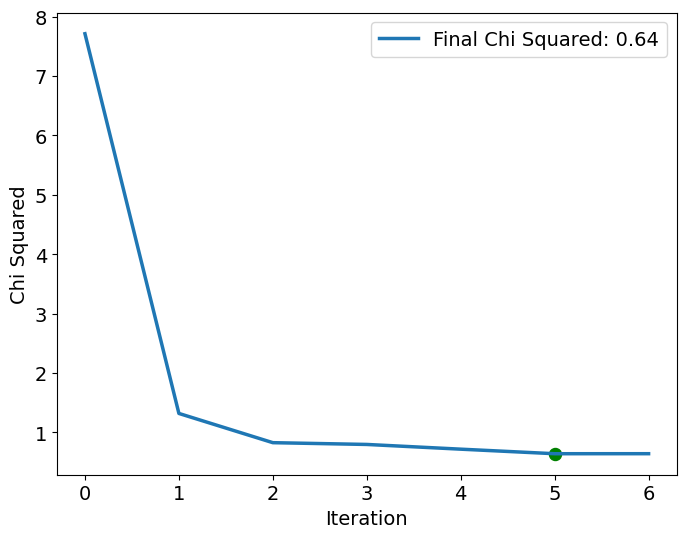

In [435]:
plt.figure(figsize=[8,6])
final_chi = np.round(chisq[f'chisq_{iter_mincost}'][0], decimals=2)
plt.plot(np.arange(0,last), [chisq[f'chisq_{i+1}'] for i in np.arange(0,last)],
         linewidth=2.5, label=f'Final Chi Squared: {str(final_chi)}')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Chi Squared', fontsize=14)
plt.tick_params('both', labelsize=14)
plt.scatter(iter_mincost-1, chisq[f'chisq_{iter_mincost}'], s=75, color='g')
plt.legend(fontsize=14)
plt.show()